## Readability analysis of Parks Canada BIA project descriptions
  
### Step 1: Preparing and cleaning project descriptions for analysis

The project descriptions have been manually checked for unusual punctuation that would confuse the readability algorithms. Four of the original 50 select BIAs were removed because they consisted almost entirely of bullet points. The remaining project descriptions can be cleaned with the punctuation cleaning function of the Textatisic library.

In [1]:
import pandas as pd

parks = pd.read_excel("data/processed/BIA_50select_edited.xlsx")

parks.head()

,BIA_no,title,description,field_unit,park,lat,lon,province,contact_internal,fuia_num,...,attach_ia,created,modified,created_by,modified_by,id,item_type,path,lang_check,wordcount
0,87,Wildfire Risk Reduction at Fort Walsh National...,The purpose of this project is to reduce the r...,Saskatchewan South,Fort Walsh National Historic Site of Canada,49.573414,-109.882274,Saskatchewan,Sherri Clifford,SSFU-2020-035-FW,...,NaN,2020-12-07 12:13:59,2021-03-01 17:16:27,Krista Cairns,Krista Cairns,192,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en,149
1,110,Shoreline Protection - Seawall Repairs,"An armoured stone seawall, located around the ...",Southern New Brunswick,St. Andrews Blockhouse National Historic Site ...,45.07707,67.06198,New Brunswick,Shirley Butland,NBSouth-2020-EIA-4,...,NaN,2020-09-25 10:24:42,2021-02-24 15:02:33,Shirley Butland,Shirley Butland,169,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en,139
2,197,Big Island Marsh DFO Fisheries Habitat Offset ...,A Fisheries Act Authorization is required from...,Waterways,Trent-Severn Waterway National Historic Site o...,44.106416,-77.231107,Ontario,Randy Power,TS-2019-05,...,NaN,2020-02-19 09:18:53,2021-07-27 11:54:55,Randal Power,Randal Power,82,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en,155
3,111,Rabbit Creek Wildfire Reclamation,In May 2018 the Rabbit Creek Wildfire occurred...,Northern Prairies,Prince Albert National Park of Canada,53 35.00,106 15.00,Saskatchewan,Curtis Matwishyn,PANP-20-1308,...,NaN,2020-09-22 10:43:58,2021-03-10 12:47:19,Fiona Moreland,Fiona Moreland,168,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en,381
4,149,Lake Superior National Marine Conservation Are...,This project will involve construction of the ...,Ontario North,Lake Superior National Marine Conservation Area,N 49.00912°,W 88.25804°,Ontario,Dan Weller; daniel.weller@canada.ca,LSM20_01,...,NaN,2020-06-23 16:58:16,2021-02-18 16:31:46,Daniel Weller,Daniel Weller,130,Item,sites/ImpactAssessment/Lists/DIA Tracking List,en,131


Reduce this table for convenience

In [2]:
data = parks[['BIA_no', 'title', 'description', 'park']].copy()

In [3]:
data.head()

,BIA_no,title,description,park
0,87,Wildfire Risk Reduction at Fort Walsh National...,The purpose of this project is to reduce the r...,Fort Walsh National Historic Site of Canada
1,110,Shoreline Protection - Seawall Repairs,"An armoured stone seawall, located around the ...",St. Andrews Blockhouse National Historic Site ...
2,197,Big Island Marsh DFO Fisheries Habitat Offset ...,A Fisheries Act Authorization is required from...,Trent-Severn Waterway National Historic Site o...
3,111,Rabbit Creek Wildfire Reclamation,In May 2018 the Rabbit Creek Wildfire occurred...,Prince Albert National Park of Canada
4,149,Lake Superior National Marine Conservation Are...,This project will involve construction of the ...,Lake Superior National Marine Conservation Area


Import the Textatistic library and clean the descriptions.

In [4]:
import textatistic
from textatistic import Textatistic

Test the library with a single sample text.

In [5]:
sample = data.iloc[2]["description"]
prepped_sample = textatistic.punct_clean(sample)
prepped_sample

'A Fisheries Act Authorization is required from DFO in relation to impacts on fish habitat associated with dam construction projects at TSW Trenton Dam 1 and Glen Miller Dam 3. The Authorization includes provisions for offsetting measures.\n\nThe construction of the Big Island causeway in the 1950’s and decreased water flows between the island and the mainland have caused the channels to be filled in with silt, and cattails now cover the entire area from the island to the mainland. Parks Canada is proposing to expand on existing fish habitat enhancements at the Big Island Marsh by constructing a new channel and widening/deepening of 2 existing channels. Cattail marsh vegetation will be removed to a width of 10 m and depths up to 3+0 m, in order to ensure these areas stay open into the future. The Fisheries Offset Plan is expected to result in the enhancement of fish habitat at the Big Island Marsh.\n'

In [6]:
textatistic.word_array(prepped_sample, prepped=True)

['A',
 'Fisheries',
 'Act',
 'Authorization',
 'is',
 'required',
 'from',
 'DFO',
 'in',
 'relation',
 'to',
 'impacts',
 'on',
 'fish',
 'habitat',
 'associated',
 'with',
 'dam',
 'construction',
 'projects',
 'at',
 'TSW',
 'Trenton',
 'Dam',
 '1',
 'and',
 'Glen',
 'Miller',
 'Dam',
 '3',
 'The',
 'Authorization',
 'includes',
 'provisions',
 'for',
 'offsetting',
 'measures',
 'The',
 'construction',
 'of',
 'the',
 'Big',
 'Island',
 'causeway',
 'in',
 'the',
 '1950’s',
 'and',
 'decreased',
 'water',
 'flows',
 'between',
 'the',
 'island',
 'and',
 'the',
 'mainland',
 'have',
 'caused',
 'the',
 'channels',
 'to',
 'be',
 'filled',
 'in',
 'with',
 'silt',
 'and',
 'cattails',
 'now',
 'cover',
 'the',
 'entire',
 'area',
 'from',
 'the',
 'island',
 'to',
 'the',
 'mainland',
 'Parks',
 'Canada',
 'is',
 'proposing',
 'to',
 'expand',
 'on',
 'existing',
 'fish',
 'habitat',
 'enhancements',
 'at',
 'the',
 'Big',
 'Island',
 'Marsh',
 'by',
 'constructing',
 'a',
 'new',
 

In [7]:
results = Textatistic(prepped_sample)

In [8]:
results.flesch_score

57.80771505376346

In [9]:
results.dalechall_score

10.622607526881719

Now, loop through the whole table. Send the readability scores to the table.

In [10]:
#clean the project description text and create a new column with the clean text
data["descr_clean"] = data["description"].apply(textatistic.punct_clean)

### Step 2: Calculate the Flesch reading ease, Flesch-Kincaid grade level, Fog, and Dale-Chall scores

Calculate each score and send it to the table in a new column.

In [11]:
data["flesch_re"] = data["descr_clean"].apply(textatistic.flesch_score)

In [12]:
data["flesch_kin"] = data["descr_clean"].apply(textatistic.fleschkincaid_score)
data["dalechall"] = data["descr_clean"].apply(textatistic.dalechall_score)
data["fog"] = data["descr_clean"].apply(textatistic.gunningfog_score)


In [13]:
data.head()

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
0,87,Wildfire Risk Reduction at Fort Walsh National...,The purpose of this project is to reduce the r...,Fort Walsh National Historic Site of Canada,The purpose of this project is to reduce the r...,68.266242,9.025523,9.461063,10.930393
1,110,Shoreline Protection - Seawall Repairs,"An armoured stone seawall, located around the ...",St. Andrews Blockhouse National Historic Site ...,"An armoured stone seawall, located around the ...",53.794565,10.653644,10.564184,12.233540
2,197,Big Island Marsh DFO Fisheries Habitat Offset ...,A Fisheries Act Authorization is required from...,Trent-Severn Waterway National Historic Site o...,A Fisheries Act Authorization is required from...,57.807715,11.614032,10.622608,14.204301
3,111,Rabbit Creek Wildfire Reclamation,In May 2018 the Rabbit Creek Wildfire occurred...,Prince Albert National Park of Canada,In May 2018 the Rabbit Creek Wildfire occurred...,71.855802,8.702299,8.991844,11.045989
4,149,Lake Superior National Marine Conservation Are...,This project will involve construction of the ...,Lake Superior National Marine Conservation Area,This project will involve construction of the ...,43.157519,11.959850,12.058374,16.321805


### Step 3: Analyse the results

Start with basic descriptive statistics.

### Flesch reading ease

In Flesch reading ease, a score between 60 and 70 is considered "plain English," according to R. Flesch.

In [14]:
data["flesch_re"].describe()

count    46.000000
mean     55.969102
std      11.705788
min      20.721667
25%      50.617665
50%      56.048854
75%      62.865047
max      83.055682
Name: flesch_re, dtype: float64

The scores indicate an average reading level that is fairly difficult, requiring high school education.

The lowest score is very difficult.
The highest score is easy to read.

In [15]:
# What is the text with the minimum score of ~20 on Flesch reading ease?
data[data.flesch_re == data.flesch_re.min()]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
27,115,Junior Commissariat Officers' Quarters - Recap...,The recapitalization of the Junior Commissaria...,Niagara National Historic Sites,The recapitalization of the Junior Commissaria...,20.721667,18.65,11.921633,22.533333


In [16]:
data.iloc[27]["description"]

'The recapitalization of the Junior Commissariat Officers’ Quarters, a federally Recognized Heritage Building, is part of a series of Federal Infrastructure Initiative projects initiated in 2015 at Butler’s Barracks National Historic Site.  The Junior Commissariat Officers’ Quarters is structurally unsound in certain areas, and renovations to the structure will be substantial including the replacement of the roofing system, stabilization and repointing of the chimneys, reconstruction of some of the walls, improvements to drainage around the exterior of the building, and installation and upgrading of utilities.  This project will allow Parks Canada to explore future uses for this important heritage building. '

In [17]:
# What is the text with the maximum score of ~ 83 on Flesch reading ease?
data[data.flesch_re == data.flesch_re.max()]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
10,271,Culvert Replacement with Larger Diameter,A new culvert needs to be installed on the bo...,Elk Island National Park of Canada,A new culvert needs to be installed on the bo...,83.055682,5.773788,8.641642,7.812121


In [18]:
data.iloc[10]['description']

' A new culvert needs to be installed on the boundary road north of Osten Lake Camping access on RR 205. The culvert has collapsed and completely rusted out  and the site is currently flooded due to beaver activity and Strathcona County culvert failure on RR 205.Currently beavers have a deep run/washout through the boundary road making it impassable. The new culvert will be a larger diameter (600mm) due to the sizes that are currently kept in stock for replacements.  The old culvert was 450mm.  The work will take place when there is no water flow through the boundary road. Three inch minus pit run gravel will be used to fill the road base on the top and sides of the new culvert. Strathcona County plans to repair the culvert through RR 205.'

In [21]:
#What is the text with the median FRE score? 
#There are 46 texts, so just say we will look at text #13 in a sorted list of FRE scores.

sorted_FRE = sorted(data.flesch_re)
sorted_FRE[12]



50.76092307692309

In [22]:
data[data.flesch_re == 50.76092307692309]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
45,274,Artificial Turtle Nest Site Creation,In an effort to reduce road mortality and nest...,Thousand Islands National Park of Canada,In an effort to reduce road mortality and nest...,50.760923,11.99241,9.925516,15.171966


In [23]:
data.iloc[45]['description']

'In an effort to reduce road mortality and nest predation for rare turtles, Thousand Islands National Park is planning to build a small artificial nesting site near Polly Creek.  The site will be approximately 5m x 5m large and 1m deep, consisting of sand and gravel surrounded by cedar logs.  Turtles in the area are experiencing significant road mortality and are primarily nesting on road shoulders where near complete nest predation has been documented.  The artificial nest site should reduce the number of turtles coming onto and alongside the road.  Materials will be brought to the site using a small tractor and / or a motorised wheelbarrow and construction is planned for October 10, before turtle hibernation begins. '

### Flesch-Kincaid grade level

In [19]:
data["flesch_kin"].describe()

count    46.000000
mean     11.219487
std       2.340706
min       5.773788
25%       9.926090
50%      11.022567
75%      12.063938
max      18.650000
Name: flesch_kin, dtype: float64

The average score is 11.2, which is grade 11.
The worst score is 18.7, which is college grad level.
The best score is 5.8 which is about grade 6.

In [20]:
# What is the text with the minimum Flesch-Kincaid grade level (easiest to read)?
data[data.flesch_kin == data.flesch_kin.min()]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
10,271,Culvert Replacement with Larger Diameter,A new culvert needs to be installed on the bo...,Elk Island National Park of Canada,A new culvert needs to be installed on the bo...,83.055682,5.773788,8.641642,7.812121


In [21]:
data[data.flesch_kin == data.flesch_kin.max()]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
27,115,Junior Commissariat Officers' Quarters - Recap...,The recapitalization of the Junior Commissaria...,Niagara National Historic Sites,The recapitalization of the Junior Commissaria...,20.721667,18.65,11.921633,22.533333


In [24]:
# Get the middle (13th) F-K text

sorted_FK = sorted(data.flesch_kin)
sorted_FK[12]

10.139285714285716

In [25]:
data[data.flesch_kin == 10.139285714285716]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
44,243,SaskPower Pole Replacement near Rec Hall,SaskPower is proposing to replace an urban pow...,Prince Albert National Park of Canada,SaskPower is proposing to replace an urban pow...,63.08,10.139286,10.198027,12.892857


In [27]:
data.iloc[44]['description'] # middle scoring F-K text

'SaskPower is proposing to replace an urban power pole, transformer, and take off equipment, then trench and lay approximately 30 metres (m) of secondary cable to a customer owned splitter, at which point the customer will be responsible to connections.  Ground disturbance will be limited to the base of the pole and the short run of trenching.   The work will take place near an existing underground cable, within a developed area and existing roadways in NW-10-057-01 W3M, within the Waskesiu Townsite in Prince Albert National Park (the Project).  The Project is required to provide an additional service point near the library/recreation hall.\n\nEquipment that is expected to be used for completion of the Project includes: a digger truck, back-hoe, trenching equipment, and crew trucks.  Access to components of the Project will make use of existing roads and trails.  Surface disturbance is expected to be minimized to the base of the pole and 30 m of trenching.  \n'

Okay, so the Flesch reading ease and the Flesch-Kincaid scores agree on what the most and least readable texts, as we would expect.

### Gunning Fog index

The Fog index is on a scale from 6 to 20+, with 6 meaning 6th-grade reading level and 20+ meaning a post-graduate reading level.

In [22]:
data["fog"].describe()

count    46.000000
mean     13.948139
std       2.716629
min       7.812121
25%      12.243517
50%      13.831072
75%      15.385849
max      22.533333
Name: fog, dtype: float64

The average is 13.9, which is a college freshman. 
The worst score is 22.5, which is college graduate.
The best score is 7.8 which is 8th grade. So, here the Gunning Fog thinks BIA 27 is two grade levels harder than the Flesch scores suggest.

In [23]:
# What text has the minimum Fog level (is easiest to read)?
data[data.fog == data.fog.min()]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
10,271,Culvert Replacement with Larger Diameter,A new culvert needs to be installed on the bo...,Elk Island National Park of Canada,A new culvert needs to be installed on the bo...,83.055682,5.773788,8.641642,7.812121


We have agreement with the Flesch tests here.

In [24]:
# What text has the maximum Fog level (hardest to read)?
data[data.fog == data.fog.max()]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
27,115,Junior Commissariat Officers' Quarters - Recap...,The recapitalization of the Junior Commissaria...,Niagara National Historic Sites,The recapitalization of the Junior Commissaria...,20.721667,18.65,11.921633,22.533333


In [28]:
# What is the middle scoring text according to Fog?
sorted_GF = sorted(data.fog)
sorted_GF[12]

12.273446327683615

In [29]:
data[data.fog == 12.273446327683615]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
14,205,Agricultural License for Grazing Former Mankot...,Grasslands National Park proposes to issue a l...,Grasslands National Park of Canada,Grasslands National Park proposes to issue a l...,53.520791,10.68,10.499763,12.273446


In [30]:
data.iloc[14]['description'] # middle scoring text for Fog

'Grasslands National Park proposes to issue a license of occupation to graze cattle over 8 sections in the Former Mankota Community Pasture area of the East Block of the park. Cattle grazing has occurred in this area previously under a grazing permit, and before acquisition by Parks Canada was used for grazing livestock. Domestic livestock grazing is used in this area to maintain a disturbance regime supporting habitat maintenance for species at risk and for prairie ecosystem function. No new infrastructure will be constructed as part of this program. Activities will include moving cattle in and out of grazing paddocks, maintaining/repairing fences and watering systems, and checking cattle. This project will be assessed with a basic impact assessment. '

Again we have agreement with the Flesch tests.

### Dale-Chall score

On the Dale-Chall index, 4.9 or lower is easily read by a fourth-grader. A score of 9.0 to 9.9 is college level.

In [25]:
data["dalechall"].describe()

count    46.000000
mean     10.636148
std       1.031821
min       8.641642
25%       9.991736
50%      10.531973
75%      11.217013
max      13.142302
Name: dalechall, dtype: float64

The average score is 10.6, which is college level. So the Dale-Chall and Gunning-Fog are in agreement that the average is college level. The Flesch scores put it a little lower, at high school level.

The worst score is 13 -- post graduate.
The best score is 8.6 -- understood by an 11-12th grade student. 

Overall, the Dale-Chall thinks the texts are harder to read than the other scores suggest. Especially the Flesch-Kincaid grade level, which found a text appropriate for a 6th grader -- six grade levels of variation among scores for the "easiest" text.

In [26]:
# What text has the minimum Dale-Chall score?
data[data.dalechall == data.dalechall.min()]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
10,271,Culvert Replacement with Larger Diameter,A new culvert needs to be installed on the bo...,Elk Island National Park of Canada,A new culvert needs to be installed on the bo...,83.055682,5.773788,8.641642,7.812121


Agreement with the previous tests on which is easiest to read. 

This score (8.6) means that the text is readable by an 11th-12th grader.

In [27]:
# What text has the max Dale-Chall score?
data[data.dalechall == data.dalechall.max()]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
29,39,Vegetation Management - Bennett Lake Dam & Wol...,Fundy National Park intends to initiate a vege...,Fundy National Park of Canada,Fundy National Park intends to initiate a vege...,21.688684,17.252279,13.142302,21.211504


In [28]:
data.iloc[29]["description"]

'Fundy National Park intends to initiate a vegetation management plan to reduce the potential hazards of excessive vegetation growth (seepage caused by deep roots, cavities created by decaying roots, erosion caused by uprooted trees, competition from undesired vegetation, dense vegetation obscure the ability to observe deficiencies, etc) on the Bennett Lake Dam and the Wolfe Lake Water Retaining Structure.  If left unchecked, the existing vegetation could pose a serious threat to the strength and stabilize to both of these structures. The proposed vegetation management activities will be conducted periodically during the growing season and repeated annually. A Basic Impact Assessment is required to investigate the potential impacts of the proposed vegetation management activities. '

In [31]:
# What is the middle scoring by Dale-Chall?
sorted_DC = sorted(data.dalechall)
sorted_DC[12]

9.994865217391304

In [32]:
data[data.dalechall == 9.994865217391304]

,BIA_no,title,description,park,descr_clean,flesch_re,flesch_kin,dalechall,fog
8,273,SaskPower Pole Mount Transformer Replacement f...,SaskPower is proposing to replace a pole mount...,Prince Albert National Park of Canada,SaskPower is proposing to replace a pole mount...,62.843043,10.207826,9.994865,13.721739


In [33]:
data.iloc[8]['description']

'SaskPower is proposing to replace a pole mount transformer on an existing wooden pole, and directionally drill 65 m to a customer supplied metering point in SE-16-57-01 W3M within Prince Albert National Park. The project is required to increase the capacity of the line and maintain the quality of service to an existing customer.  Equipment that is expected to be used for completion of the project includes: a digger truck, back-hoe, bucket truck, directional boring equipment, and crew trucks.  access to components of the project will make use of existing roads and trails. Surface disturbance is expected to be minimized to the bell holes at the existing pole and metering point.'

### Step 4: Graph the scores 

Graph the scores. Each formula is going to need it's own graph.

It doesn't make sense to standardize the data and compare scores that way, because that emphasizes the relationship between the formulas, rather than the scores for these texts. The 0-1 or normal scale is hard to interpret as reading difficulty. Also, you need to know either the min and max observable points for each formula, or the mean and SD of the population for each formula. Both are difficult to estimate. 

In [29]:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from pandas import DataFrame

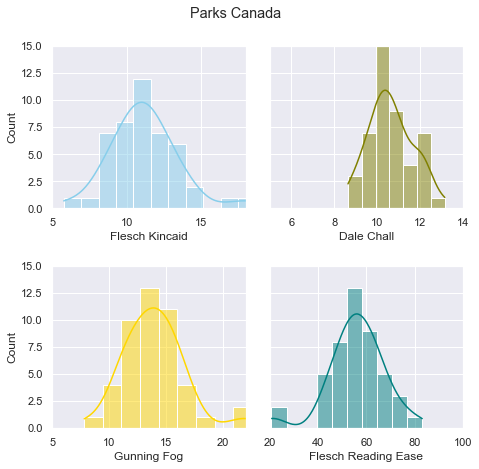

In [32]:
sns.set(style="darkgrid")


fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharey = True)

sns.histplot(data=data, x="flesch_kin", kde=True, color="skyblue", 
             ax=axs[0, 0]).set(xlabel = "Flesch Kincaid")
sns.histplot(data=data, x="dalechall", kde=True, color="olive", 
             ax=axs[0, 1]).set(xlabel = "Dale Chall")
sns.histplot(data=data, x="fog", kde=True, color="gold", 
             ax=axs[1, 0]).set(xlabel = "Gunning Fog")
sns.histplot(data=data, x="flesch_re", kde=True, color="teal", 
             ax=axs[1, 1]).set(xlabel = "Flesch Reading Ease")


fig.tight_layout(pad = 2, rect=[0, 0.03, 1, 0.95]) # add space between subplot rows and main title

for ax in axs: # make the y axis the same for all subplots
    plt.setp(ax, ylim=(0,15))
    
axs[0,0].set_xlim(5,18)  # flesch-kincaid x-axis
axs[1,0].set_xlim(5, 22) # gunning fog x-axis
axs[0,1].set_xlim(5, 14) # dale chall
axs[1,1].set_xlim(20, 100) # flesch reading ease
    
fig.suptitle("Parks Canada")
#plt.show()

plt.savefig("output/parks_histogram.png")

### Step 5 : Save data for use in agency comparative analysis

In [31]:
#data.to_excel("data/processed/parks_scores.xlsx", index = False)